In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.preprocessing import normalize,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline



### Import Data

In [24]:
car_data = pd.read_csv('car data.csv')
car_data.head()
# car_data.shape



,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [25]:
# car_data.info()

In [26]:
car_data.isnull().sum() 
# Chech that Data is clean or not if not we have to clean it.
# we have taken cleaned data already.

# No missing values or garbage value present in our dataset.

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [27]:
# print(car_data.Fuel_Type.value_counts())
# print(car_data.Transmission.value_counts())
# print(car_data.Seller_Type.value_counts())

### Normalize and preprocessing data

In [28]:
# STR = {'Kms_Driven' , 'Year','Present_Price','Kms_Driven'}
# for i in STR:
#     X_Mean = car_data[i].mean()
#     max_val = car_data[i].max()
#     min_val = car_data[i].min()
#     car_data[i] = (car_data[i] - min_val )/(max_val - min_val) 

In [7]:
Y = car_data.Selling_Price
X = car_data.drop(['Car_Name' , 'Selling_Price'] ,axis =1)
X
# Making INPUT and Output DATASET 


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,0
297,2015,5.90,60000,Petrol,Dealer,Manual,0
298,2009,11.00,87934,Petrol,Dealer,Manual,0
299,2017,12.50,9000,Diesel,Dealer,Manual,0


In [32]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.9)
X_train.shape

(270, 7)

In [33]:
# str = ['Fuel_Type' , 'Seller_Type' , 'Transmission']
# car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
# car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1 }}, inplace=True)
# car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

ohe = OneHotEncoder()
ohe.fit(car_data[['Fuel_Type' , 'Seller_Type' , 'Transmission']])
# car_data.head() 
# At this point we are just fitting our columns into ONEHOTENCODER  not transforming it.

OneHotEncoder()

In [34]:
transform_column = make_column_transformer((OneHotEncoder() ,['Fuel_Type' , 'Seller_Type' , 'Transmission']),
                                       remainder="passthrough")

model = LinearRegression()

In [11]:
pipe = make_pipeline(transform_column , model)

pipe.fit(X_train,Y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])])),
                ('linearregression', LinearRegression())])

In [35]:
train_data_predict = pipe.predict(X_train)
error = metrics.r2_score(Y_train , train_data_predict)
print(error)

   

0.892650379731434


Text(0, 0.5, 'Predicted price in ')

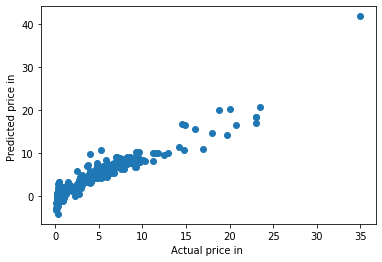

In [36]:
plt.scatter(Y_train , train_data_predict)
plt.xlabel("Actual price in ")
plt.ylabel("Predicted price in ")


### TEST_DATA  predict

In [37]:
test_data =  pipe.predict(X_test)
test_error = metrics.r2_score(Y_test , test_data)
print(test_error)

0.8217063708526537


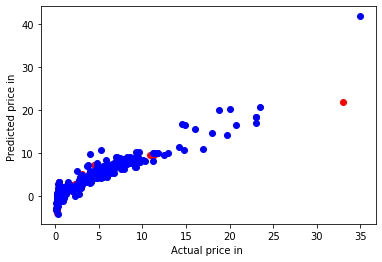

In [38]:
plt.scatter(Y_test , test_data , c='r')
plt.scatter(Y_train , train_data_predict,c='b')
plt.xlabel("Actual price in ")
plt.ylabel("Predicted price in ")

plt.show()

In [39]:
X_train['predicted_price'] = train_data_predict
X_train['selling_price'] = Y_train
X_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,predicted_price,selling_price
18,2015,5.09,35500,CNG,Dealer,Manual,0,3.419243,3.25
300,2016,5.90,5464,Petrol,Dealer,Manual,0,5.024981,5.30
141,2016,0.80,20000,Petrol,Individual,Manual,0,1.547943,0.60
120,2016,1.26,5700,Petrol,Individual,Manual,0,1.848763,1.05
21,2017,5.71,2400,Petrol,Dealer,Manual,0,5.387823,4.90
